In [16]:
from __future__ import print_function
import requests
import json
import cv2
from time import time

start = time()

addr = 'http://localhost:5000'
test_url = addr + '/predict'

# prepare headers for http request
content_type = 'image/png'
headers = {'content-type': content_type}

img = cv2.imread('672220.png',cv2.IMREAD_UNCHANGED)
# encode image as jpeg

_, img_encoded = cv2.imencode('.png', img)

# send http request with image and receive response
response = requests.post(test_url, data=img_encoded.tostring(), headers=headers)
#response = requests.post(test_url, data={'encoded_image' : bytes(img_encoded)}, headers=headers)
# decode response
print(response.text)
#print(json.loads(response.text))

print(time()-start)

# expected output: {'answer': '672220'}

{"answer": "672220"}

3.109591484069824


In [2]:
## from __future__ import print_function
import requests
import json
import cv2
import base64
from time import time

start = time()

addr = 'http://localhost:5000'
test_url = addr + '/predict'

# prepare headers for http request
content_type = 'image/png'
headers = {'content-type': content_type}

with open("672220.png", "rb") as img_file:
    base64Encoded = base64.b64encode(img_file.read())
print(base64Encoded)



b'iVBORw0KGgoAAAANSUhEUgAAAHgAAAAoCAYAAAA16j4lAAAMgklEQVR42u1bC3CU1RXeXUISloQQ8n4sSTAkJNm8WAIJz/AISSaSUMcEkYhgS9XOCDodh2ptIyoPWwvaAlPEIipTCyPIq7WWWp22irYUKqWRMhUzWsNzwFIMSUh2+53l3PTm539tshsss3fmyya79+659373PO8fi8Vi8QRxU+PaDxMtB9gLuPnV723IkCGOhISE+enp6avGjBmzLT8/f09eXt7OkSNHfp+7WC2Ba9bIyMhYjc9sQBQQYfn/aj4RnMXkUn/3sGHDSmJiYlL6OwO73T4WhK4eN25cc3l5uUcNubm5dKDygUlAGdAIVNGZ6Kf4YYmJiXc7nc4N06ZN+3FdXd3S6urqOfHx8Qn8eSRQDjwEPAysBF4EHuX59LcVA9OABJZ1Qwm2Wa3Wt4Tqx8bGHsemvD1p0qSWoqKiMyCoHWR0Am3AKWA3sB596qdMmZIkEzZ+/HgPxngmTJjg0SJVRmZmJsn8FfAR8AnwG+AE0M3oBFqBHcAC1rjr2syZM7PKyspWFRcXH3K5XDRXD+bnmTp1ajfLujJ9+vS38fl9ID4OQ74BHAE+BPYBu4HfA5f4sJPsi2zRNOVyGwOsBz4Dunj8ZV4Pre12IPWGEYzNqYImHRAEDxo0yANyexGBjfKAaC+IvIkTJ3rfKykp8RQWFnrGjh3rmTx5siaR2PzrvpMIgNkW/qSVX/8I3AmEAfUAHbyTvOH0eTPgEnMHadMwj4M4aKYOFHAEB2A6rNRe/r5P+ZXW/zUglDXuCSbMrSZXas/w5x3AYeBbwK3Ar4GrkowGIHrACa6srKyaNWvW+1h4e0RERI8DHzVqlNkN04TQ5tLSUu/faiRERUW5paBho2J6tNkVwMfAOalfG5k/jI2mA0YHTU0+HSD5VfyOQ7ERMUGr9H0bVLYmmt+/qpQr9Xmd3+/mA2GX5p0E/EI6ILSGW/wYax

In [101]:
from __future__ import print_function
import requests
import json
import cv2
import base64
from time import time

start = time()

addr = 'http://localhost:5000'
test_url = addr + '/predict'

# prepare headers for http request
content_type = 'image/png'
headers = {'content-type': content_type}

response = requests.post(test_url, data=base64Encoded)
print(json.loads(response.text))
print(len(base64Encoded))
print(base64Encoded[-20:])

{'error': "unsupported operand type(s) for /: 'NoneType' and 'float'"}
1512
b'nnEAAAAASUVORK5CYII='


In [1]:
from __future__ import print_function
import requests
import json
import cv2
import base64
from time import time
import requests

base64Encoded = b"iVBORw0KGgoAAAANSUhEUgAAAHgAAAAoCAIAAAC6iKlyAAAM0ElEQVR42u2ad0xVzRbFPzti74q9ErvP3nvvYldAsUWjKDbsFXsvINiwRiXGXhIrKmIviL2jxgKIYsPue7+4k8nkHLhcin7vD+YPcjln7pyZNXuvtfac+88/Se2vtf/+lfbs2TM/P7+JEycOGDBg+PDhy5YtCwgIePfuXaIM/uvXrwsXLqxatcrDw2PevHn79++PiIhIxMnfvn3b19d35MiRXbt2bdOmTadOnYYMGeLp6Xn9+nVrvv43gH7//v2ePXu6dOlib2/v5OQ0ZcoUNze3unXrFilSpFGjRlu2bEng+N++fQsODp40aVK7du0YsEmTJnzo06fPokWLbt26lcDB/f39Bw8enD9//phitHv37n8Q6LCwsM2bN9fXWkw9IyMjx48fX65cuQoVKmTMmDFNmjSpUqVKmzZtnjx5+JdHDxs2TO/88ePHS5cujRgxAsgyZMggncuWLUu3mzdvmsf/8ePHwYMH2b/6pta2bdvFixe/ePFC3xL+RkVFMdT69evHjh3bqlWrxo0bszcdO3acPHkyQ5EZ0nnfvn2JyAfxAZqJrl69GiDq1KlTqVIlEKxRo4a528+fPw8cOJArVy7Gz5w585IlS2TNXD916hQLM0wUfInB8uXLA25MSxo0aNDXr1/1p+zcubNZs2aCbPPmzYnlpk2bKqzBEezYDOl87ty56dOnd+jQgVtMvnLlyv/53VhFlSpVqlevzvVu3boJG9Dt3wT67du3Pj4+LKZevXpqPdWqVTP33LFjB/HL4HZ2ds+fPzfcBa9s2bKpp588eZLIsrGxiXVVdPv+/bt6BPutptGgQQNBkKamR2q/fv1a+nfu3Ll+dK3e78aH1q1b892GDRtevnwZovvXgCavN23aRKIZZmmmDnQpRYoUjJwyZcpoU54M3bBhgzz9yZMnBhLku7a2thbiWtQJXBRMsMf58+d//W5nz56VsJXGgySTWrZsKVcMSzDjDu0kT548EdXLWqCZJYm/du3aFi1aGKZFOOtAs04ggFhlZFdXVwtjSh+kPFmyZDrKK1asCA8Pv3LlysKFCwFF2FxWLu3o0aPu7u4yAWKwR48eSK5O3LATgani4M2bN9gbcrFfv35eXl7Hjx9HJ4kGSBwX5OzsrAhHtq127dp58+a1HugvX748ffo0oUAz74cPH65cuRJilfTUW8WKFXWgHz9+jKNQiNy9ezdWWYeX9YBFCfUcOnbsGLyZJUsWhTV/YQyFY61atQIDAw3DkvtKIWFqREXXQ9lmWRoBBNFjN1WYMybEjSmKFhmI6/79+1A/qoMhYYcKFSrElAoXLpxQoEHZ29ubbBJCREMwkgpoxFAB/eHDh1mzZglp0HALscYCMWVgCVTRQDLgiNApkURa5aEgwjZjHM3D3rhxA7ejq6KyE+aGYKDbvXv3VkAXK1YM4HhWSEjIkSNHyDAsKYOUKFEiJq0Ga4NQxw1oqgzyV2IZoMkp2GPUqFFqDWy+Avrw4cOAq56tW7eY2sCBA3VOoEmsGYJoxowZOELpQKyRNPL0qlWrLliwwDwsQae4hYYvMuyfoT169IjZsn9oIIKBLIuSW9kkosEqnkCTufAaYg3KKA90DCHCj5R2ag14IwGarOzVq1fq1KnV47dt22bYM3jg9OnT+GV10cHBAcGMVcSp9EqWLMld1i9bKw3egHCjdUdUbqob1g3jrO4iAGfOnOHKhAkTSAjwTZ8+vZWYIif58uUDEEBgj6nFoHsLsWwV0JRtAMGgiDh/QRlXL+joaxCg79y5wwz0OZF0XL937960adOoWZAXAhASgBARTLG3MKnB1UU7aVK4QIEC3M2RIwfgqqcT2tGGKkmAsaMDKUgokPIQQs+ePZmA0L2VLWfOnIzg4uIyZswYKnuqGD1KEsd1EHrCGGiRGOf27dvL0YQIkcHeLV26VLGzNLQeCXV0dMRXlSlTBnYTd0HUs/hXr17xLdjf8C0WE60dFHIUyHTj/OnTJ+nDh6CgoO3bt6MTEG6mTJn09Iq1kVjYGyosxI15enp6cvHEiROEBVvLEqiGgAKGIS8tMH4cgGYUzEr//v1ZCZkFIcjCRNxDQ0P1zJUPbIC5lMIOUomxPSQ+LIQH8vX1VUlKsDx48IAyTKpH1dhd80Tx2oKFmBwCmdhED4oWLSo8RrroHtFyYw7wD0vD2+GyIR80WcUNiQtBwTy646RxES7GuRI0yKNZS+IMNFDOnj0b6WPNTEUiaM6cOXI3ODhYAU3lKh/gB4NLo5FuLIa4pjLEuuAE9u7dq5s/FgwX8XXDF+nTqVMnVIE5sJdwqLhaoDQQujUyBTTZs2cnTtesWUMJqp9+iLRQmquiEdnk6dAFEc3u4lZhOczi5s2biRgVJYCu29D4AI1F27p1K1aGcclBcfLMQ2Uo+29QQhrZlC5dun/3sBdugVjYHpIdX8TGi37IJKndo6VycJTNlkY3Vcoa+IGk3L17tzI/NCyvOg+IM9DUS3369OGR2DieSjSRZWirfohh8HY0KgID1f6FhqwR6WgD5QMspA6PWDy+2FBSUY+Yz1cxDOSuqsLoc/XqVQt40R8i1eeAGMQTaDhL1zrVoGAIF1e0bt06dZEIwj+iITHxI5nLXaIA81uqVCmCSyouvTEIJEMZXbBgQQvj8Bc2h0lwmZLdMgezLoWFhcGhapJUWFKz6LVuVFQUZfro0aMVygRWrOfXuEYclGFuME98gF6+fHl9iw39AbLcuXPHqunq2ExvM2fONHSzs7OT4wIIlMSHgnS4YVhgZRv4TCmhShVwEfHQTzlUtQIcasLIJn/79u2rXkTcvXuXeHJ2dlZ9sBPQsTXvcSidDPOHAOID9KFDh5gEHovoI+mEOoTskL44GaZoHzlu3DhDN4TFMIF+/frxUAp9qBbBAAJol55YaRXIYg/4YPbR/v7+FJyqm0yedIQrUEJ4dtKkSeokj51zdXVFmayUNfP8ydEE+WhDICPHWbNmNTwD3AltApxYM/sBs1AQEUOHDrUMtG7psCsMwgeqD4l9QU03l+bKECuNTHELDkTMZT+wHPgl8pUAVNwI3Ah+rHWdfuJo/fzjc0wKQMxPxxdqVpaDxnrM5Hvt2jXDOFg9gcxMHRZaQECAWEDKQiFcPVQNZx3ELOwk519iEKX/xo0bPTw8KDrUsR+UQrEXp7qDIqtr165mt5M4QBtQppjWj+5wUaQ5ppK/unCZzzpoV65cYZ3ckiNmafCj5Qn4+PggDPIt9XTGEdD1r0MOfn5+YoqxTM2aNSPqwRQ7gYcjfuVojIugDB3FtZKmWoa7zGV6IgANyvqgSIruOuW4knbnzh0oVUQM8xATgqCAx+AWC1Zjzp0718IEiFBqVDlLI3bIG9FAcAQvls2/Fy9eFJ8rB14SxU5OTjVr1hR/giejLJDtkZcVgE56xfUXDVhJ8dHqPZw1gWIV0OvXr9dR5mFTp041++jPnz8T1FI4oZkqp3TjARW6ubnZ2tqyeMRKHS7DAKR/UFAQlsvwdIZFmUuXLq3mgE6o9w+gJgf/eJLIyMgjR46wJWyAoMxdUU7UBSzUnEGfb+mHeeZG/QVfGcDBzBBMSBEo81A1Jb3ISJyIFscK05kjmuu7du0SiMGCkDG/yiLc6ADKFOKKZyi1pba2sbEBcV9fXyomUGNX+Lto0aLixYvrKcWA7Ip4BolcUFMvwuWkCdzhCnUOQ00h6Ks3MnwIDQ2NackjR47kQQSvDk5ERARmH5FA+alxsABy18JPLeLM0Qa7hoBEC3R4ePiECROYAaiBJhNSTI1zCAwMBB0HB4fDhw+vXbtWbiFQO3fuZBAr/SIoy1Djx4/X3/KYDZJygfPnz9cnDNAEgTqiibbJeawiQCryly9fksfsFom4f/9+0kW9QqI4+lNAL1u2TM0JJdR/QIPWDRo0iPqN/JKSTL7I2lg8c8XzsmwoBaeBXxZywHVxyzLEGTJk8PLyUj8sobTBlrm4uBDL6n1xld+NgJWiBuoQfsDYmdGkm6oSVMXAcvhcqFAhXa4hCq4gsFu2bCEX5RcpKVKkYNfV+c8fAZrsjjaixWaCGkGEphcrVozUtre3J8YREBwhkwMvcPH29jZbV5iOKpluelmIgYHESYWzZ8+aXz5xERMNiZM08AlEDLjEHVyBX9ZfLBGVXJESMdbGzBEbnotuo71wl7yaQJDz5cvXoUOHhQsXWn7nnThAE1DkPsUbc3J3dzdzOgLIPCjPqMFCQkLiaqEOHDhAsMAM+IcpU6YQlTENYuXJmd4ovslIR0dHC0DzXLaQ+cfVliQy0KqROHDFn/t1JMbOgmQlsMGt+/btQ2yROPaVeg+BkZ98qJ8kJGJLENBJLQnoJKCTgE5qSUAnAZ3UkoD+PwU6qf2F9j9t1CmIulnUZwAAAABJRU5ErkJggg=="
test_url = 'http://localhost:5000/predict?site=법원'

#response = requests.post(test_url, data = base64Encoded)

In [18]:
import numpy as np
from PIL import Image
from io import BytesIO
decoded = base64.b64decode(base64Encoded)
img_array = np.frombuffer(decoded, np.uint8)  
print(img_array.shape)
# decode image
img_array = cv2.imdecode(img_array, cv2.IMREAD_UNCHANGED)
print(img_array.shape)

(3337,)
(40, 120, 3)


In [19]:
import sys
from time import time
sys.path.insert(0, './BeobWon')
from BeobWon.predictCaptcha import PredictCaptcha as BeobWonPredictCaptcha

start = time()

predictor = BeobWonPredictCaptcha()  
answer = predictor.predict(img_array)

print(answer)
print(time() - start)

469025
7.46299934387207


In [11]:
from __future__ import print_function
import requests
import json
import cv2
import base64
from time import time
import requests

base64Encoded = b"iVBORw0KGgoAAAANSUhEUgAAAGQAAAAoCAIAAACHGsgUAAAPFUlEQVR42u2aCTTVaR/HH64rgzRSdMO8eSdmKsvRFO0jpCiRXVmqyQ1lHVRSjSwRKkqLkqxZKkRpmUZUkko17SVatdEm0Tben/9zPf53dc103vOe8/Y//3OP+m/P/dzv7/t8n+f5I/R169VmbGxsYmIyZcoUMzOzadOmWVhYTJ8+3dLScubMmdbW1jY2NnZ2dvb29o6Ojk5OTrNnz3ZxcXF1dXV3d583b94vv/yyYMECNpu9cOFCLy+vRYsWLV682NfX18/PLyAg4Ndffw0KCgoJCVmyZEloaOjy5ctXrFixcuXK3377bfXq1REREVFRUdHR0TExMWvXro2Pj09ISFi/fn1iYmJSUtKmTZuSk5O3bNmybdu27du379ixY+fOnWlpaenp6ZmZmVlZWTk5Obt3787LyysoKNizZ8++ffsKCwv3799fUlJy4MCBgwcPHjp06MiRI0ePHj127Ngff/xRUVFRWVl58uTJU6dOnT59+syZMzU1NefOnTt//vyFCxcuXbr0559/Xrly5erVq9evX7958+bt27fr6urq6+sbGhru3bvXDcvU1BRgTZ06FWABqRkzZowfb6GqGqOpGTBqlOO0aZYODg4Ay9nZec6cOUDKzc1t7ty5GJaHhwfA8vT0BFhAysfHB0j5+/sDLCAVHBwMpJYuXRocHGJnFzB+fLiOzuYffsgwN18eGRkJpNasWRMbGxsXFwew1q1bh2Ft3LgRSG3evHnr1q0YVmpqKsDatWsXhpWdnQ2wcnNz8/Pz91Db6tUb3d2Tp07NGju2yNBwv7f3FoAFpH7//XcgVV5eDrBOnDgBsKqqqjCss2fPAqna2loM6/Lly0Dq2rVrN27cuHXrFsC6c+cOwLp79+79+/e7YRFZmZubY1lpaXkh1EF2OblaLa2lpqa2GBbICmDNnz8fYBFZeXt702UVGBhIZBUcvGzMmEom8wO5oanpKiIrDAvLasOGDSArDAtkBbBSUlKIrABWRkYGkRWgW7hwnb5+Cb2peHd3Tzl8+DCR1fHjxzEsLKvq6mq6rC5evEiXFYZFl1U3LFyDWFakBlmsDfwtoPYnCB1H6KLAowCLyArXIJaViUmRjEwb98nVRFa4BomscA0SWW3blhoQUGZlVauj86jr2ucIVSJ0VkgLOfcvLj6Qk1O0f38paCs//0hhYSnI6uDBY/HxVW5ujUOGvANYRFYYFpYVvQZBVgDrwYMHHFi4BomsoAbBreTlT4hsCuxvEapBqBwhOLMaoTMIvcE1SGSFa9DBYVPfvq/5Lm+gywrDwrICXHFxWzw9D5qZXRw6tFFSEq5tROgG9SBgdLOnhnHu7+5eY2n50NCwadiwpsmTn2lrv+nfv47JbKGOvkSoCdcglhWuQSIrXINEVg8fPuTAEmjtY8ZYIVRFiQia2CBG4z7CJ7+1L14coKz8RODJAq0dNje3o3Jy7Qg9xfqVkfkgIdHj0z8jVEu1tpL65eBX/NRja8W0dpAVFyy6tQMpKyurWbNmcd8dzq4QVn3Ufhs+eazd3z9QV/ecsJMFWntYWIqS0hugw2R+kpV9Ly39USSp18LrsaF//3bRrRXT2oHUo0ePOLB4rB0nBoBla2tLTwzY2h0cnAwN2SxWLt/jT2trn6LXIMhr8uR8IW09DZ8CrX3NmgRLy5QZMyqcnU/Y21f/9FO9hMRffJc/MzbetXz5epIYiouLITSQxADWnpe3Z8mSLISgy39PMT3D3wAxrR1gNTY2cmDxWDuWFY5XJDHgeEUSA/SDM2Z4Kyk9oHWXZT4+AcTaYbOyWicj04oQfNV6qqLpbQWn6xBt7fBnfHyquTm/ljvNlMQrIFVUVETiVVlZGYlX0Amqqb0zN3+yatVVd/dM/gaIae0gq8ePH3Ng8Vg7kRWGRZcVhgWkbGx8tLQqJSU5vsBgfLK2DqXLyt19lYoK6byaBwzYx93WSgyLx9rp8QoSw4oV27W1H/LB6rwWx6u9e/cSWZWWlgIsLCsSr0himDmzgP8mYlo7L6xepXZb2wVaWjlSUt2OMGFCNt3a/fyWaGjcoDQFR99/912DhsZe7raCGXf0mNrnzctVVubvRjuv7W1qHzWqnP8mYlo71CAXLB5rJ7LiT+2zZ3tpaR2Rln5HHqyhcYIer8DZ9fROSUh8xke//bY5KGiNouIF7rZCxuvoMbUbG1f06fOBD1bntVhWUIybNmWlp5eAtrKzC0BcwlK7qupN/puIae1A6smTJxxYYlo7yMrJyVVTs0JK6j15qqxsHZsdRE/tZmZ5kpIcUtLSrZ6eSTAYZDDa+XvuHlM7i/VcUFcI1zZJSp5iMG5KSX1WUmpTVGxXU3vr4FAXFpZZWFgmMLXT20waIKa1A6ynT59yYIlp7Y6ObF3dUgbjI+2RHywtk4msYLO3XyYr29LVmlYnp10wcoa8xdOX4T9EpHaAFR2dxWB8pmC1Uzu+FnqMW8ICwTfffDI2vl9cfJjICtcg+L7ABohp7SCrZ8+ecWD1aO0Ay87OWU+viMnEQxYwIyjDt0OH1pCRMwwS7ewWDRhArOGFicmBsLAwgOXpGcDd1ht0WAKtPSkpee7czl4PtENFYjFTe+c+ZEjDvn0niKwAVkZGgcAGiGntICsuWKKt3dbWdfToHXJyzV2k4PMRk9k6b95SGEXDtSNHjpSUZFA3k4axJkIuLJYvQIejMDB0dfXnbisnpoqw9tjYJFPTq1Qhf6RgcSXbvn3btbWf6es/UVFpGjCgjS+IvVBWflRcXEUmZDZsyBTYADGtHUg9f/6cA0u0tTs4uI4dmyovD2d3dNk2FELh4MEzlZWVJSQkepwvk5GRQ2g8Qm4IrUYoG6FihI5ALHR0XCHM2pctSxg2DHJgR58+H6nBw0Vd3b0WFilsdlZs7LHk5AOxsflJSTvT0/NCQ2GMXS8tzTO4qdfTe0UmZMLD07mPnsR/iGntAKupqYnzZURYOxCbNCm4f/8yCYkrCJUgFIjQTwgxvsScYz95eXV9fX0YP8BPAp0DjH5AWdjavbwSVFReUz8PqOaFpORfOTm50PdBvILQQE/tEEijovaOG8cz/KyhhlNX8YRMUBAPrAoCSxxrB1jNzc3dsIRZu5nZAhYLIpKCsG8MypKTU2cyfRAqpWZOziN0AKEkqESExiD0b6owxd2YTObgwYN1dXU1NSczGBslJA4jVAfmqK7+Mjc3V1hqz84utre/w4/DyKgJz/N5eQmI77CLae1Qg92whFm7tfWcH39MYTLP830pSShAEAVQnjgxsF+/Zlo76qhBfzP3fMBdhI4hlIIQdIu2COkhJN8bDUrJyPwLCMKwDOILmCBULlAjqR3SqJNTGn9Al5f/BLCqq6vnzs0RCEtMa4ca5IXFY+0gLAODdQoKYBxRXY0GfS0GBf388xYy166vHy5+P0WzDBjWHkQoDyEokJWjR4/W0NCQl+8FQVC0kpKSjo4OVDFEZQODZMq2X5GZP6on/QtPHzs753E34DiBJY61A6kXL15wHizQ2i0s2Orq56nRn1ZXCzdTA+YXnp7eJDHo6UX3hOYaQpcFWgbZibVDtwgJdurUhYqKYQjNl5KaiNAgINMbGSohZAidFvwGTOYuuCcMre3sCgQ2QExrB1gvX77k3F6gtY8cGSIrC9o7RfyYmq7sMDAooc+16+rGCmSkqnrYxCTMzy8oIiLCwCCRv0ZgFzbX7uy8Y+DAFipkfqAe2rZyZXJISAgoCEZmUP6DBg1iMHrRyUhJyVC1b0P5wDaENlDO8FlMawdZvXr1inMvfmufNWuOhkYxJSuPrifa4SGCi8tyXIM4tc+axdbWThg6dIem5k4dncSJE8Ps7X1geLhq1Sqy3iUCFj21k/Uuc/MiClMHFd/fMJmf+a0dPlNTU6OiothsTw0NCCVWCI1A6JveaFAaat/IyAh8EOSclpYGoR+o8Vs7yIoLFo+1m5h4KyvfomI66Qc7pw1YrDosK4Fz7cuWLQsNDcWpHUiFh4cDqcjIyDFj1gusAp7Ujte7EhN3Tpx4CxIDxAUquH8YPvypsAkZ+Fy06KiiIhn3/UXNdsHgZinEOjW1saqqGnJycuLzk5SUVFNTu3DhAt3agdTr1685Z/Cn9nHj/BQUHlMBEm9gW024Bv/GMuq4cXEC/RWn9tjYeLqsIiNTR426h2M6jktGRg1kQobFajE1vRccXJuQUJWZWebpeV1FpY022L6H20kegfd+/a5TXUo2lYrdEdKmrFAoLyhGurUDrDdv3nAO86f2kSP9qUmYKV13CMc1OH16sohlVCIrXINYVtHR0UZGawTCwrJycUkcNKhZT69g/vxokFhIyLYRIzrNUUEBYEES7vDwOJ+cnBIRsTUuLgMCKtWSFjzHQttBU4+gZvE/R4woEdnnVHStTl2iKmYtQmwYpamrqwMp+OSxdoDV0tLSDYtnQsbKyn7CBGvCGiFOb8Jm+wtbRsU1SGSFaxAvo5qZraYmtq5T3UU5GRVja1+wIJLJpM9k3BX0d1VPfe7Lrsm11oSEq/n5hTDEobIoXPhY0PnPqWn4cirH1OP/BGsHjyc1SGQFNdgNS+CEDHSRqqqqFCkz8gy6tfMso5IapFs7Xkb19V0aFBQaHx8vLDGAYfn6RklJVVC/dgc3rArqW1UKYdTCYFyXlW00NGx2dHyQlHSJvjpfU1NDW8spFz51wVG6MGuHGuSFJXCuHf4TjrLZbLI63ytrF7aMKtDa8ep8YGDMpEm7+vZt5PlKCgrvhw9v+v77VyxW68CBDywsdsfEbOefa8ew8Oo8eZWBzLWXlh7x9c0fMaKWfmcbm8PCUjuR1du3bzmw/jffkImJSfTwWG9hsWPs2PzRo4utrQuio/MiI9O2b8/452/InDlzNjm50Ne30MbmUGBgkbDUTmTV2trKgfXP35ARZu1f5A0ZnBhwvMKJAa93fcE3ZISldmztIKt3795xYPHPtffqDRkR1v5P3pDBEzIillG/4BsywlI7rkGQFRcs/mVUUoNYVn/P2nt8Q4bUIJEVhiViQoZnGZU+10639l69ISPa2oFUW1sbB5ZAayc1+F+zdpAVrkG6rMRfRhVt7eLPtfNbO8Bqb2/ngvX/+fKjONYOsN6/f8+B9dXaRVs71GA3rK/WLtraoQa7YX3dxNz+A8fJS1ofHChYAAAAAElFTkSuQmCC"
test_url = 'http://localhost:5000/predict'

response = requests.post(test_url, data = base64Encoded)

In [2]:
import numpy as np
from PIL import Image
from io import BytesIO
decoded = base64.b64decode(base64Encoded)
img_array = np.frombuffer(decoded, np.uint8)  
print(img_array.shape)
# decode image
img_array = cv2.imdecode(img_array, cv2.IMREAD_UNCHANGED)
print(img_array.shape)

(3918,)
(40, 100, 3)


In [3]:
import sys
from time import time
sys.path.insert(0, './MinWon24')
from MinWon24.predictCaptcha import PredictCaptcha

start = time()

predictor = PredictCaptcha()  
answer = predictor.predict(img_array)

print(answer)
print(time() - start)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
74151
7.488471508026123


In [35]:
image_array.shape

(40, 120)

In [ ]:
img_shape = img_array.shape
new_img = np.zeros(img_shape, np.uint8)
for i in range(img_shape[0]) :
    for j in range(img_shape[1]) :
        for channel in range(img_shape[2]) :
                new_img[i,j,channel] = 255 - img_array[i,j,channel] 
image_array = new_img

In [10]:
image_array = img_array
image_array = image_array[:,:,2]
image_array = cv2.resize(image_array,(120,40))
image_array[0,:] = 255
image_array[-1,:] = 255
image_array[:,0] = 255
image_array[:,-1] = 255
(thresh, image_array) = cv2.threshold(image_array, 127, 255, cv2.THRESH_TRUNC | cv2.THRESH_OTSU)
image_array = image_array / thresh
image_array = np.round(255*image_array).astype('uint8')

image_array[image_array < np.mean(image_array)] = 0
image_array = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGBA)

In [9]:
image_array = img_array
image_array = image_array[:,:,2]
image_array = cv2.resize(image_array,(120,40))
image_array[0,:] = 255
image_array[-1,:] = 255
image_array[:,0] = 255
image_array[:,-1] = 255
(thresh, image_array) = cv2.threshold(image_array, 127, 255, cv2.THRESH_TRUNC | cv2.THRESH_OTSU)
image_array = image_array / thresh
image_array = np.round(255*image_array).astype('uint8')

image_array[image_array > np.mean(image_array)] = 255
img_shape = image_array.shape
new_img = np.zeros(img_shape, np.uint8)
for i in range(img_shape[0]) :
    for j in range(img_shape[1]) :
                new_img[i,j] = 255 - image_array[i,j] 
image_array = new_img

(40, 120)


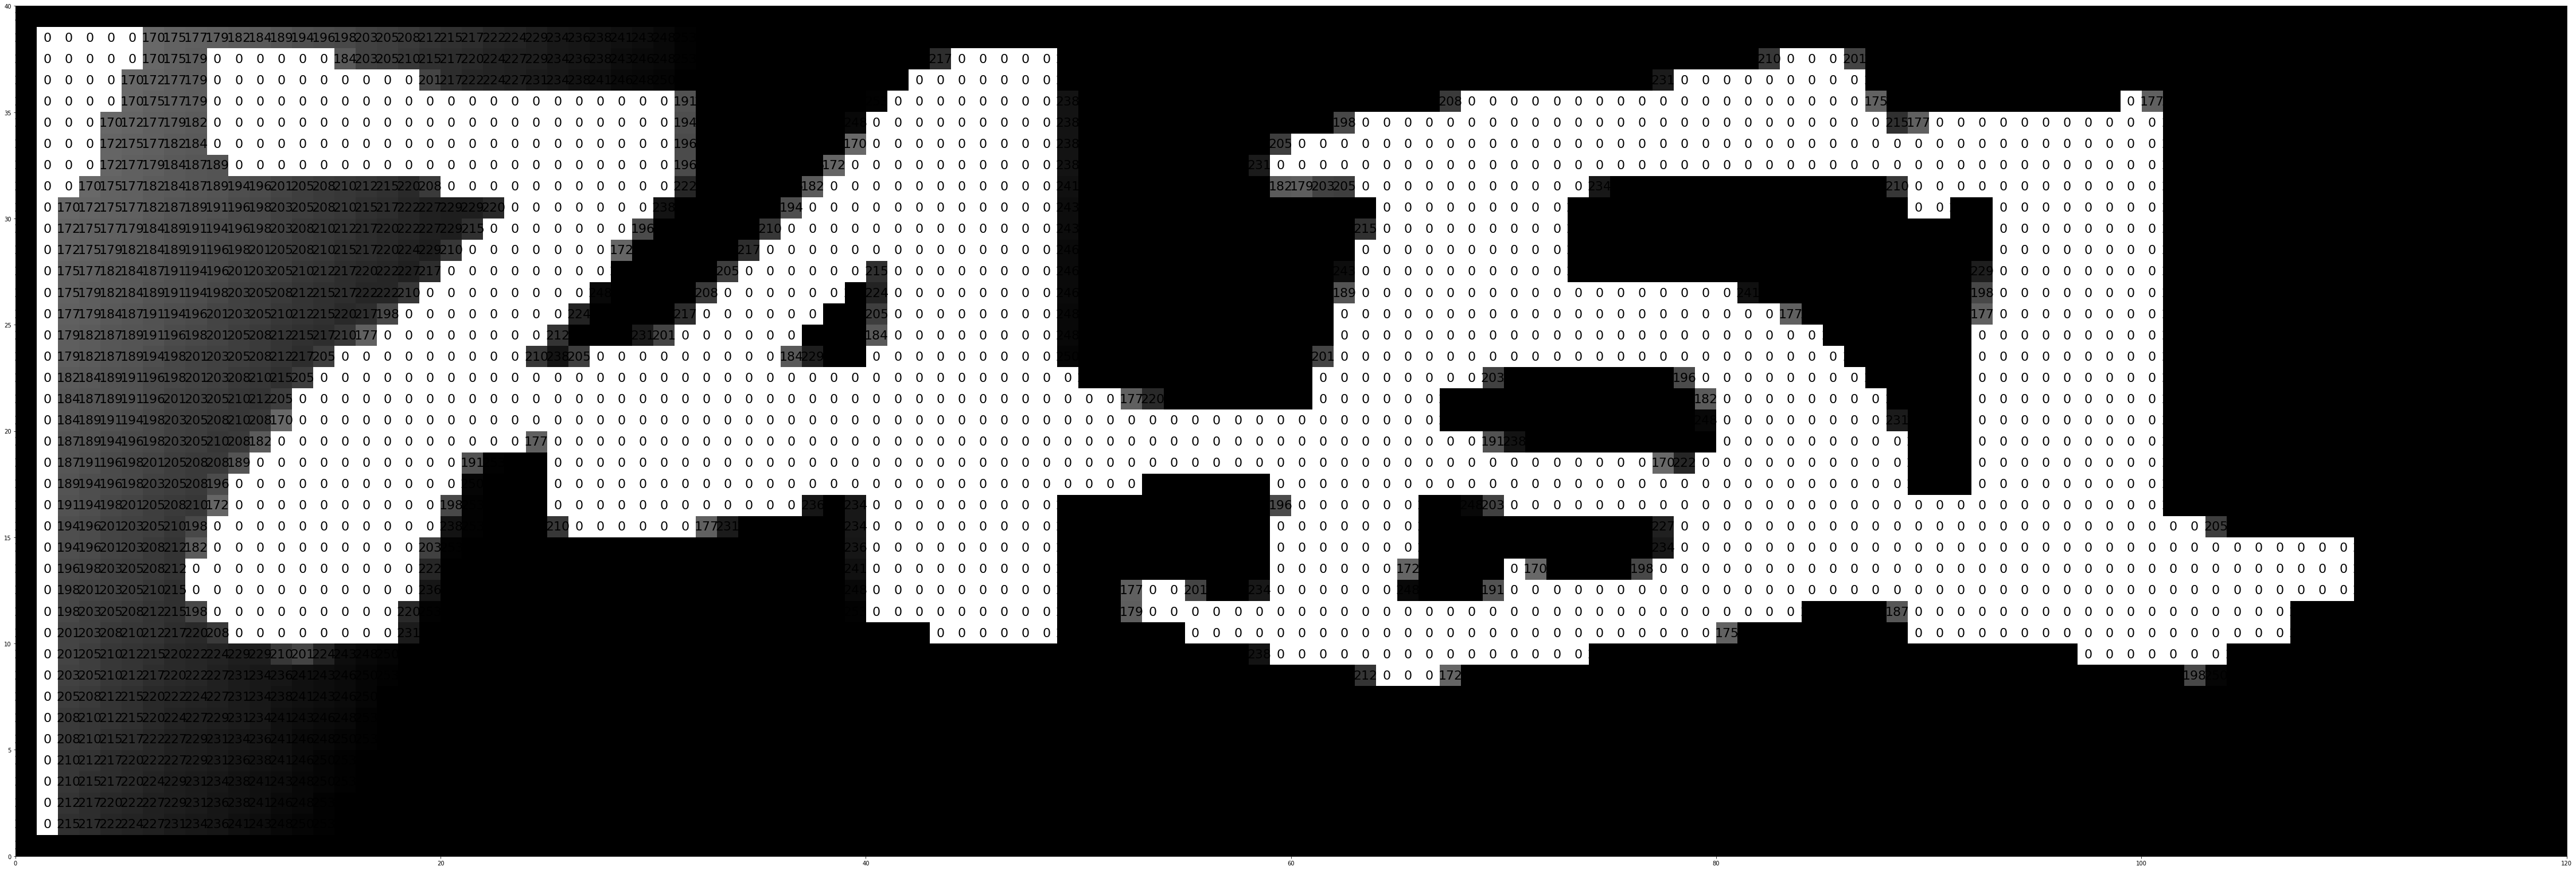

In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 5
image_grayscale = image_array
image_grayscale = np.flip(image_grayscale,axis=0)

width = 120
heigth = 40
data = image_grayscale
print(data.shape)

# Limits for the extent
x_start = 0
x_end = 120
y_start = 0
y_end = 40

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16*5, 12*5))

ax2 = fig.add_subplot(211)
im = ax2.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='Greys')

# Add the text
jump_x = (x_end - x_start) / (2.0 * width)
jump_y = (y_end - y_start) / (2.0 * heigth)
x_positions = np.linspace(start=x_start, stop=x_end, num=width, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=heigth, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center',size = 22)
plt.show()

In [16]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 5
image_grayscale = temp1
image_grayscale = np.flip(image_grayscale,axis=0)

width = 120
heigth = 40
data = image_grayscale
print(data.shape)

# Limits for the extent
x_start = 0
x_end = 120
y_start = 0
y_end = 40

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16*5, 12*5))

ax2 = fig.add_subplot(211)
im = ax2.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='Greys')

# Add the text
jump_x = (x_end - x_start) / (2.0 * width)
jump_y = (y_end - y_start) / (2.0 * heigth)
x_positions = np.linspace(start=x_start, stop=x_end, num=width, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=heigth, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center',size = 22)
plt.show()

NameError: name 'temp1' is not defined

(40, 120)


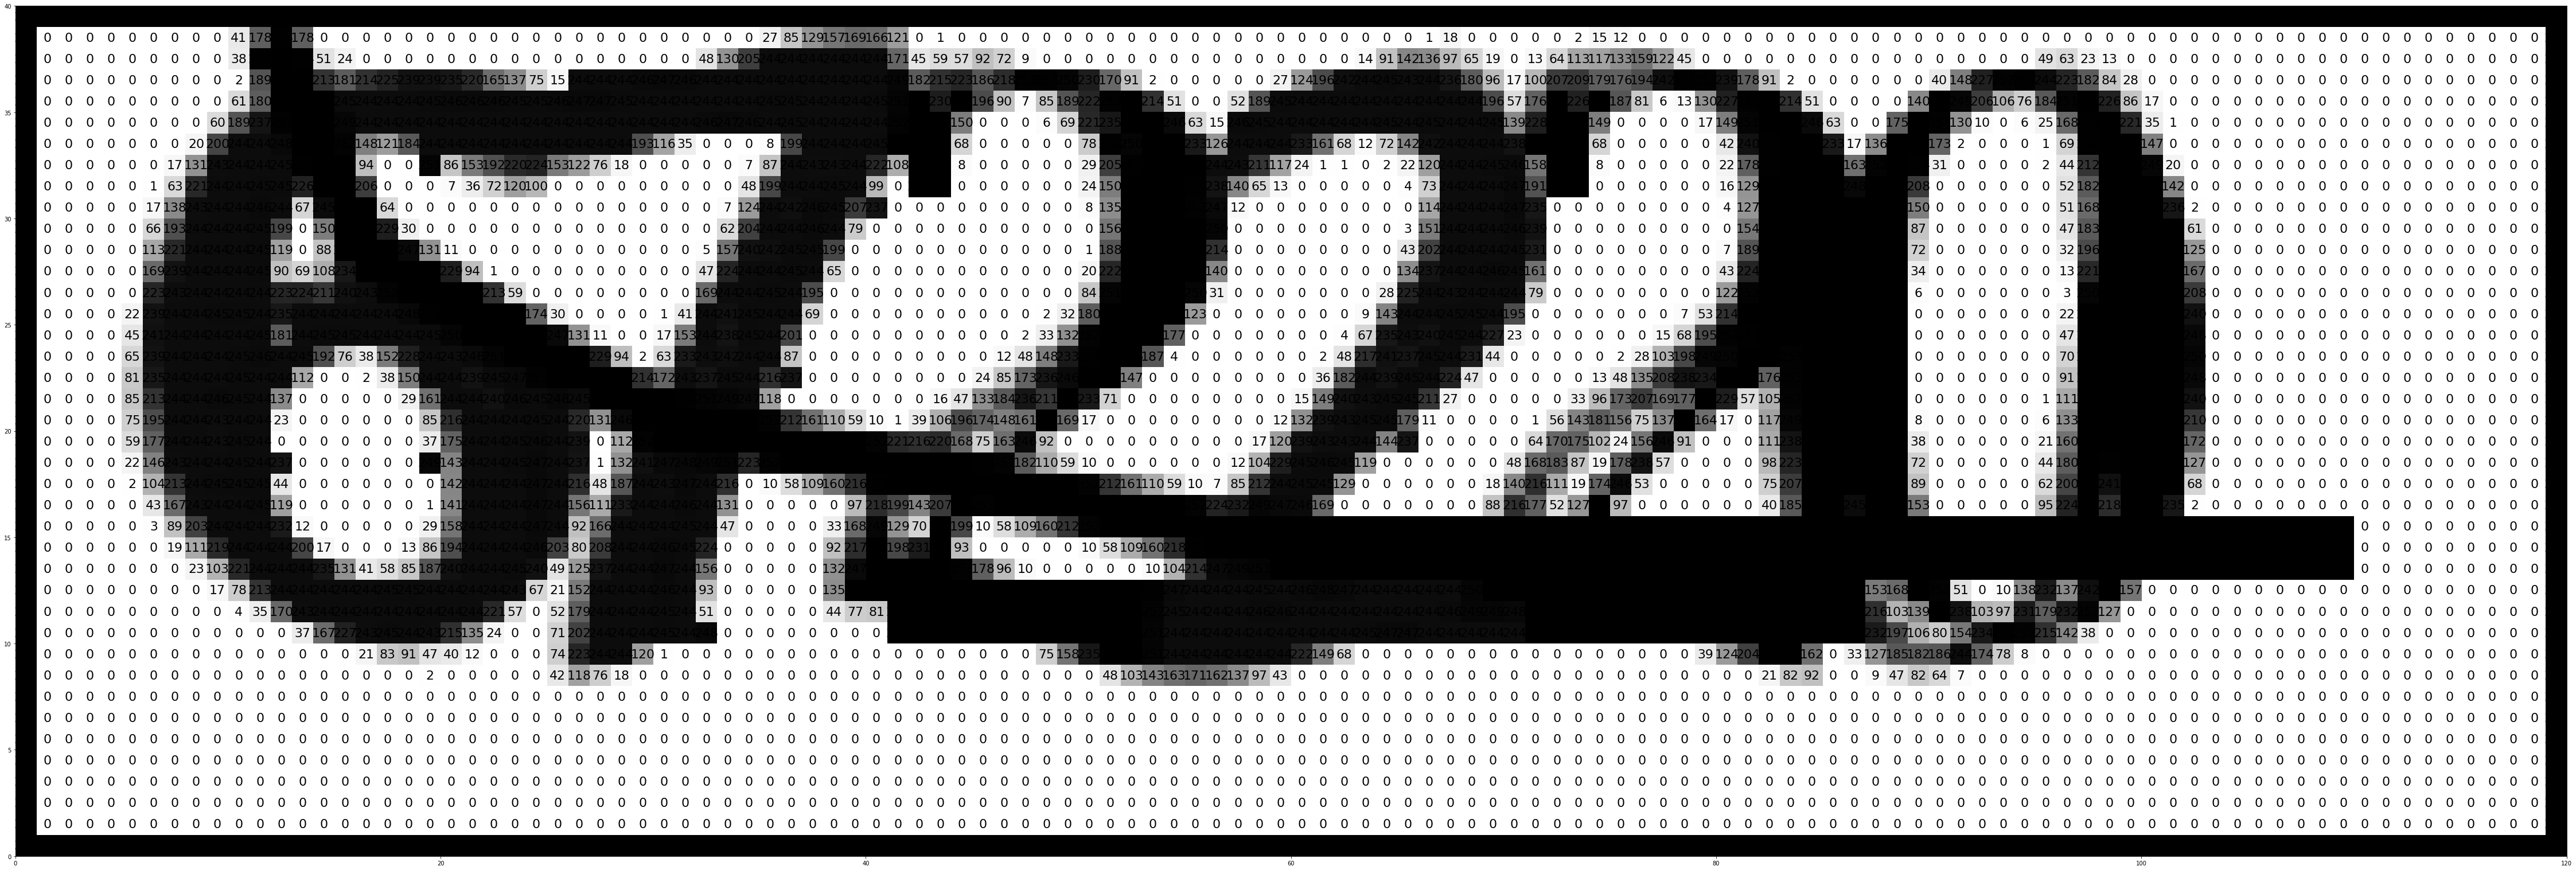

In [70]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 5
image_grayscale = img[:,:,0]
image_grayscale = np.flip(image_grayscale,axis=0)

width = 120
heigth = 40
data = image_grayscale
print(data.shape)

# Limits for the extent
x_start = 0
x_end = 120
y_start = 0
y_end = 40

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16*5, 12*5))

ax2 = fig.add_subplot(211)
im = ax2.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='Greys')

# Add the text
jump_x = (x_end - x_start) / (2.0 * width)
jump_y = (y_end - y_start) / (2.0 * heigth)
x_positions = np.linspace(start=x_start, stop=x_end, num=width, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=heigth, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center',size = 22)
plt.show()

(40, 120)


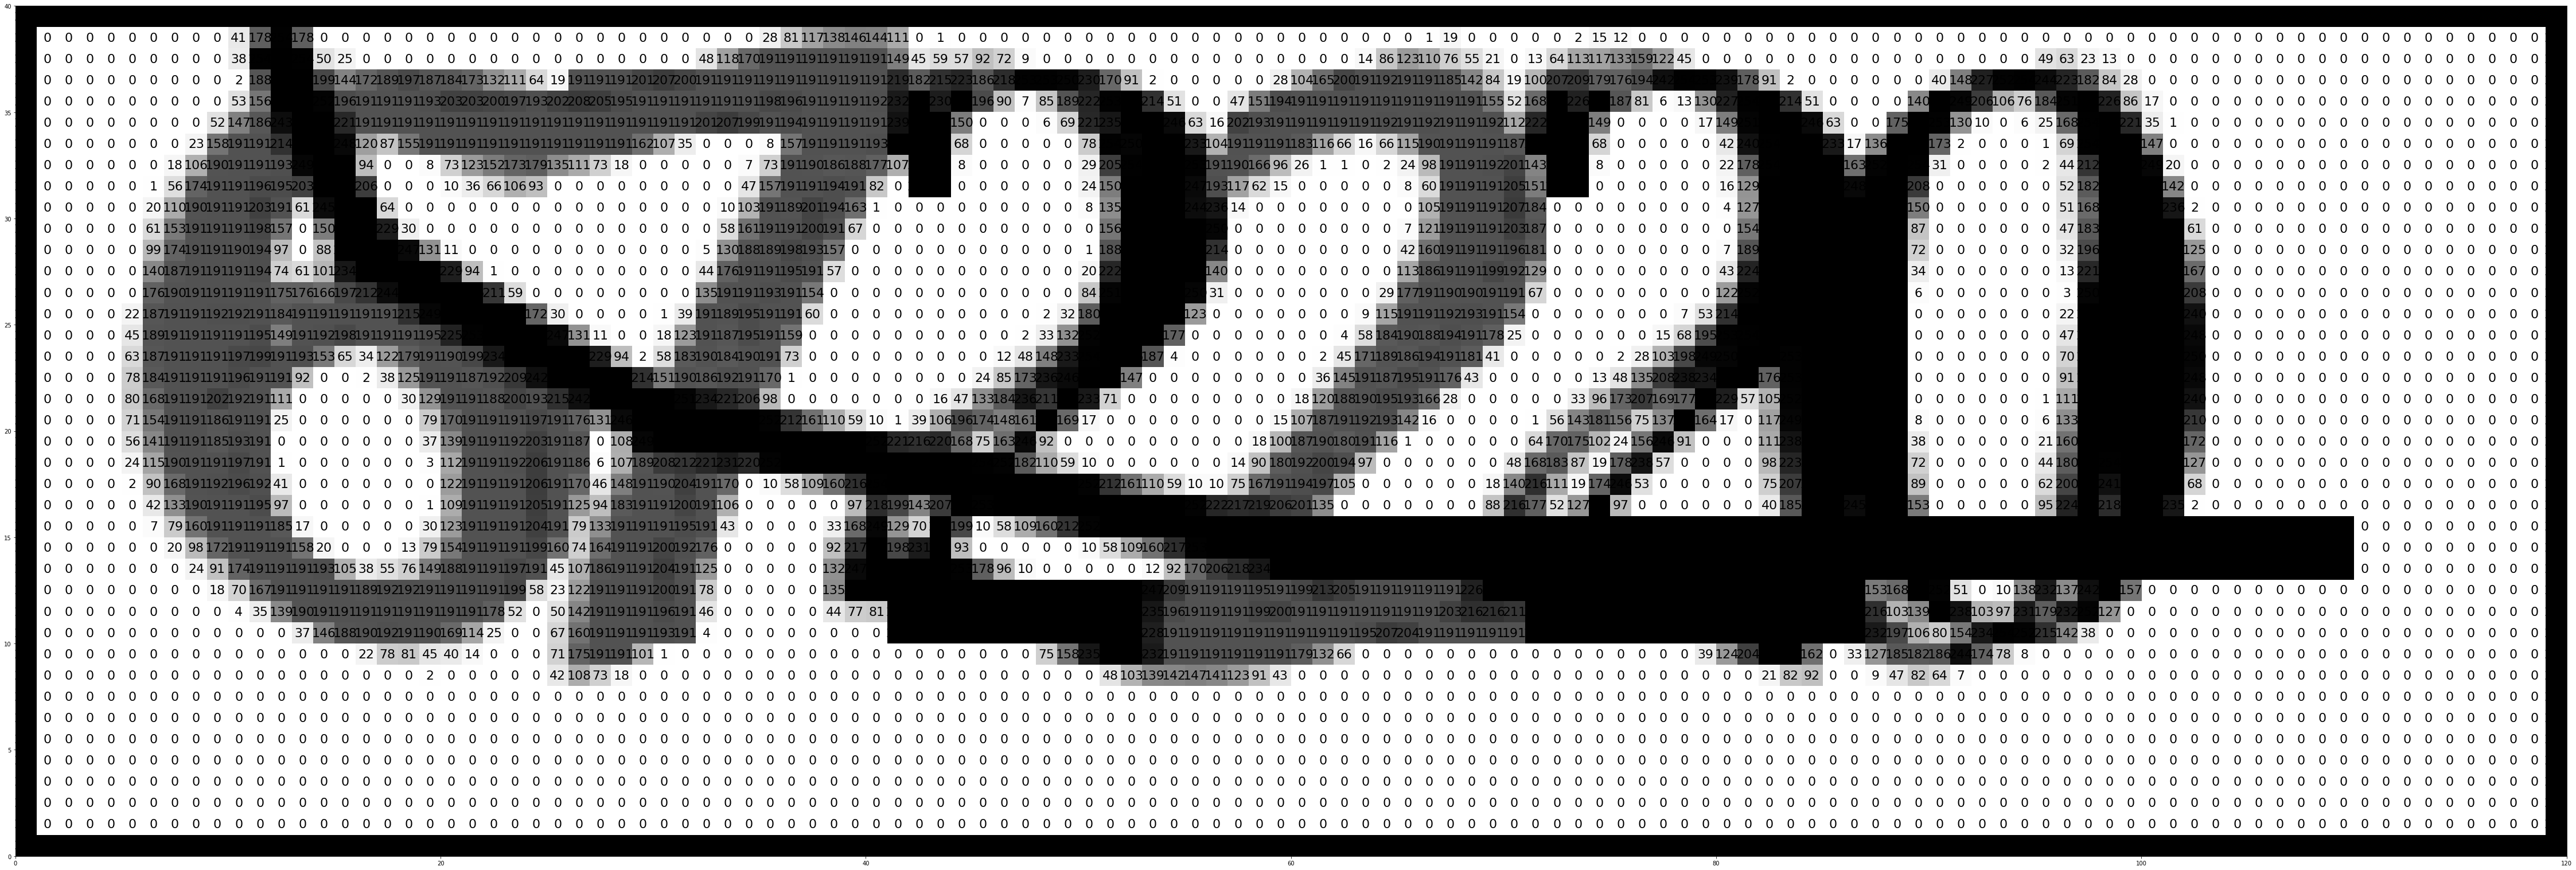

In [71]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 5
image_grayscale = img1[:,:,0]
image_grayscale = np.flip(image_grayscale,axis=0)

width = 120
heigth = 40
data = image_grayscale
print(data.shape)

# Limits for the extent
x_start = 0
x_end = 120
y_start = 0
y_end = 40

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16*5, 12*5))

ax2 = fig.add_subplot(211)
im = ax2.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='Greys')

# Add the text
jump_x = (x_end - x_start) / (2.0 * width)
jump_y = (y_end - y_start) / (2.0 * heigth)
x_positions = np.linspace(start=x_start, stop=x_end, num=width, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=heigth, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center',size = 22)
plt.show()